# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** I Made Sandika Wijaya
- **Email:** sandikakadek2018@gmail.com
- **ID Dicoding:** I Made Sandika Wijaya

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan penjualan pada tahun 2017?
- Kategori produk manakah yang memiliki rata-rata review tertinggi?
- Kategori produk manakah yang paling sering dipesan?
- Darimanakah customer dominan berasal?

## Menyiapkan library yang diperlukan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
customers_df = pd.read_csv('https://github.com/Sands225/e-commerce-dashboard/raw/refs/heads/main/data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
geolocation_df = pd.read_csv('https://github.com/Sands225/e-commerce-dashboard/raw/refs/heads/main/data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
order_items_df = pd.read_csv('https://github.com/Sands225/e-commerce-dashboard/raw/refs/heads/main/data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_payments_df = pd.read_csv('https://github.com/Sands225/e-commerce-dashboard/raw/refs/heads/main/data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
order_reviews_df = pd.read_csv('https://github.com/Sands225/e-commerce-dashboard/raw/refs/heads/main/data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
orders_df = pd.read_csv('https://github.com/Sands225/e-commerce-dashboard/raw/refs/heads/main/data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
product_translation_df = pd.read_csv('https://github.com/Sands225/e-commerce-dashboard/raw/refs/heads/main/data/product_category_name_translation.csv')
product_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
products_df = pd.read_csv('https://github.com/Sands225/e-commerce-dashboard/raw/refs/heads/main/data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
sellers_df = pd.read_csv('https://github.com/Sands225/e-commerce-dashboard/raw/refs/heads/main/data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### **Insight:**
- Mengumpulkan data.
- Menyimpan nilai setiap data ke dalam variable.

### Assessing Data

#### Menilai tabel `order_reviews_df`

In [14]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [15]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [16]:
order_reviews_df.duplicated().sum()

0

In [17]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai tabel `order_items_df`

In [18]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
order_items_df.duplicated().sum()

0

In [20]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [21]:
datetime_order_items = ["shipping_limit_date"]

for column in datetime_order_items:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [22]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Menilai tabel `orders`

In [23]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [24]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [25]:
orders_df.duplicated().sum()

0

In [26]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [27]:
datetime_orders = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_orders:
  orders_df[column] = pd.to_datetime(orders_df[column])

#### Menilai tabel `sellers`

In [28]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [29]:
sellers_df.duplicated().sum()

0

In [30]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#### Menilai tabel `products`

In [31]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [32]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [33]:
products_df.duplicated().sum()

0

In [34]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel `customers_df`

In [35]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [36]:
customers_df.duplicated().sum()

0

In [37]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel `product_translation_df`

In [38]:
product_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [39]:
product_translation_df.duplicated().sum()

0

### **Insight:**
- Menilai setiap data.
- Melihat apakah data memiliki missing value, duplikasi, dan kesalahan tipe data.

### Data Cleaning

#### Membersihkan tabel `order_reviews_df`

In [40]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [41]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [42]:
order_reviews_df['review_comment_title'].fillna(value="Recomendo", inplace=True)

In [43]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [44]:
order_reviews_df['review_comment_message'].fillna(value="Muito bom", inplace=True)

In [45]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


#### Membersihkan tabel `orders_df`

In [46]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [47]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [48]:
orders_df["order_approved_at"] = orders_df["order_approved_at"].fillna(orders_df["order_purchase_timestamp"])

In [49]:
orders_df["order_delivered_carrier_date"] = orders_df["order_delivered_carrier_date"].fillna(orders_df["order_approved_at"])

In [50]:
orders_df["order_delivered_customer_date"] = orders_df["order_delivered_customer_date"].fillna(orders_df["order_delivered_carrier_date"])

In [51]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


#### Membersihkan tabel `products_df`

In [52]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [53]:
products_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [54]:
products_df['product_category_name'].fillna(value="other", inplace=True)

In [55]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


### **Insight:**
- on `orders_reviews_df`: fixed missing value
- on `orders_df`: fixed missing value
- on `products_df`: fixed missing value

## Exploratory Data Analysis (EDA)

#### Eksplorasi Data `products_df` dan `product_translation_df`

In [56]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [57]:
product_translation_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [58]:
products_df = pd.merge(
    left=products_df,
    right=product_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32951 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


#### Eksplorasi Data `customers_df` dan `orders_df`

In [59]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [60]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-03 13:14:34.579358720,2018-01-12 14:30:34.303164416,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-04 10:26:40,2016-10-04 10:26:40,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 20:19:00,2017-09-22 17:37:01,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 16:52:58,2018-02-01 00:08:55,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 08:51:00,2018-05-15 13:48:50,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-11-12 00:00:00


In [61]:
order_customers_df = pd.merge(
    left=customers_df[["customer_id", "customer_city", "customer_state"]],
    right=orders_df[["order_id", "customer_id", "order_status", "order_purchase_timestamp"]],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

order_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               99441 non-null  object        
 1   customer_city             99441 non-null  object        
 2   customer_state            99441 non-null  object        
 3   order_id                  99441 non-null  object        
 4   order_status              99441 non-null  object        
 5   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 4.6+ MB


#### Eksplorasi Data `sellers_df` dan `order_items_df`

In [62]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [63]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [64]:
seller_order_items_df = pd.merge(
    left=sellers_df[["seller_id", "seller_city", "seller_state"]],
    right=order_items_df[["order_id", "product_id", "seller_id", "shipping_limit_date", "price"]],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

seller_order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   seller_id            112650 non-null  object        
 1   seller_city          112650 non-null  object        
 2   seller_state         112650 non-null  object        
 3   order_id             112650 non-null  object        
 4   product_id           112650 non-null  object        
 5   shipping_limit_date  112650 non-null  datetime64[ns]
 6   price                112650 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 6.0+ MB


#### Eksplorasi Data `products_df` dan `seller_order_items_df`

In [65]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,32951,32951,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000,32328
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3029
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728,NaN
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047,NaN
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,NaN


In [66]:
seller_order_items_df.describe(include="all")

,seller_id,seller_city,seller_state,order_id,product_id,shipping_limit_date,price
count,112650,112650,112650,112650,112650,112650,112650.000000
unique,3095,611,23,98666,32951,NaN,NaN
top,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,NaN
freq,2033,27983,80342,21,527,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739
min,NaN,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,0.850000
25%,NaN,NaN,NaN,NaN,NaN,2017-09-20 20:57:27.500000,39.900000
50%,NaN,NaN,NaN,NaN,NaN,2018-01-26 13:59:35,74.990000
75%,NaN,NaN,NaN,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000
max,NaN,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,6735.000000


In [67]:
seller_product_order_items_df = pd.merge(
    left=products_df[["product_id", "product_category_name_english"]],
    right=seller_order_items_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
seller_product_order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     112650 non-null  object        
 1   product_category_name_english  111023 non-null  object        
 2   seller_id                      112650 non-null  object        
 3   seller_city                    112650 non-null  object        
 4   seller_state                   112650 non-null  object        
 5   order_id                       112650 non-null  object        
 6   shipping_limit_date            112650 non-null  datetime64[ns]
 7   price                          112650 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 6.9+ MB


#### Eksplorasi Data `order_reviews_df` dan `seller_product_order_items_df`

In [68]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,88079,58477,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [69]:
seller_product_order_items_df.describe(include="all")

,product_id,product_category_name_english,seller_id,seller_city,seller_state,order_id,shipping_limit_date,price
count,112650,111023,112650,112650,112650,112650,112650,112650.000000
unique,32951,71,3095,611,23,98666,NaN,NaN
top,aca2eb7d00ea1a7b8ebd4e68314663af,bed_bath_table,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,NaN,NaN
freq,527,11115,2033,27983,80342,21,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739
min,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,0.850000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-20 20:57:27.500000,39.900000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-26 13:59:35,74.990000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000
max,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,6735.000000


In [70]:
seller_product_order_items_reviews_df = pd.merge(
    left=order_reviews_df[["review_id", "order_id", "review_score"]],
    right=seller_product_order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
seller_product_order_items_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113131 entries, 0 to 113130
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      113131 non-null  object        
 1   order_id                       113131 non-null  object        
 2   review_score                   113131 non-null  int64         
 3   product_id                     112372 non-null  object        
 4   product_category_name_english  110750 non-null  object        
 5   seller_id                      112372 non-null  object        
 6   seller_city                    112372 non-null  object        
 7   seller_state                   112372 non-null  object        
 8   shipping_limit_date            112372 non-null  datetime64[ns]
 9   price                          112372 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 

In [71]:
seller_product_order_items_reviews_df.dropna(inplace=True)

In [72]:
seller_product_order_items_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110750 entries, 0 to 113130
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      110750 non-null  object        
 1   order_id                       110750 non-null  object        
 2   review_score                   110750 non-null  int64         
 3   product_id                     110750 non-null  object        
 4   product_category_name_english  110750 non-null  object        
 5   seller_id                      110750 non-null  object        
 6   seller_city                    110750 non-null  object        
 7   seller_state                   110750 non-null  object        
 8   shipping_limit_date            110750 non-null  datetime64[ns]
 9   price                          110750 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 9.3+ 

In [73]:
seller_product_order_items_reviews_df.groupby(by="review_score").product_id.nunique().sort_values(ascending=False)

,product_id
review_score,
5,22825
4,10364
1,7343
3,5555
2,2571


In [74]:
seller_product_order_items_reviews_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique",
    "review_score": "mean"
}).sort_values(by="review_score", ascending=False)

,product_id,review_score
product_category_name_english,,
cds_dvds_musicals,1,4.642857
fashion_childrens_clothes,5,4.500000
books_general_interest,216,4.446266
costruction_tools_tools,39,4.444444
flowers,14,4.419355
...,...,...
fashion_male_clothing,94,3.641221
home_comfort_2,5,3.629630
office_furniture,306,3.493183


#### Eksplorasi Data `all_data_df`

In [75]:
seller_product_order_items_reviews_df.describe(include="all")

,review_id,order_id,review_score,product_id,product_category_name_english,seller_id,seller_city,seller_state,shipping_limit_date,price
count,110750,110750,110750.000000,110750,110750,110750,110750,110750,110750,110750.000000
unique,96320,96517,NaN,32171,71,3028,604,23,NaN,NaN
top,e8236fe7b6e1bdd513a500de361e2b87,5a3b1c29a49756e75f1ef513383c0c12,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,bed_bath_table,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,NaN,NaN
freq,21,22,NaN,524,11137,2020,27646,78976,NaN,NaN
mean,NaN,NaN,4.035395,NaN,NaN,NaN,NaN,NaN,2018-01-08 04:21:39.016532480,120.475691
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,0.850000
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,2017-09-21 02:10:21,39.900000
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,2018-01-26 19:07:03.500000,74.900000
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,2018-05-10 20:26:45.750000128,134.900000
max,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,6735.000000


In [76]:
order_customers_df.describe(include="all")

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp
count,99441,99441,99441,99441,99441,99441
unique,99441,4119,27,99441,8,NaN
top,06b8999e2fba1a1fbc88172c00ba8bc7,sao paulo,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,NaN
freq,1,15540,41746,1,96478,NaN
mean,NaN,NaN,NaN,NaN,NaN,2017-12-31 08:43:12.776581120
min,NaN,NaN,NaN,NaN,NaN,2016-09-04 21:15:19
25%,NaN,NaN,NaN,NaN,NaN,2017-09-12 14:46:19
50%,NaN,NaN,NaN,NaN,NaN,2018-01-18 23:04:36
75%,NaN,NaN,NaN,NaN,NaN,2018-05-04 15:42:16
max,NaN,NaN,NaN,NaN,NaN,2018-10-17 17:30:18


In [77]:
all_data_df = pd.merge(
    left=seller_product_order_items_reviews_df,
    right=order_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110750 entries, 0 to 110749
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      110750 non-null  object        
 1   order_id                       110750 non-null  object        
 2   review_score                   110750 non-null  int64         
 3   product_id                     110750 non-null  object        
 4   product_category_name_english  110750 non-null  object        
 5   seller_id                      110750 non-null  object        
 6   seller_city                    110750 non-null  object        
 7   seller_state                   110750 non-null  object        
 8   shipping_limit_date            110750 non-null  datetime64[ns]
 9   price                          110750 non-null  float64       
 10  customer_id                    110750 non-null  object        
 11  

### **Insight:**
- Menggabungkan beberapa data yang diperlukan dalam `all_data_df`

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana perkembangan penjualan pada tahun 2017?

In [78]:
all_data_df.head()

,review_id,order_id,review_score,product_id,product_category_name_english,seller_id,seller_city,seller_state,shipping_limit_date,price,customer_id,customer_city,customer_state,order_status,order_purchase_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure,6d803cb79cc31c41c4c789a75933b3c7,sao joaquim da barra,SP,2018-01-18 15:47:59,185.00,41dcb106f807e993532d446263290104,osasco,SP,delivered,2018-01-11 15:30:49
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure,6d803cb79cc31c41c4c789a75933b3c7,sao joaquim da barra,SP,2018-01-18 15:47:59,185.00,41dcb106f807e993532d446263290104,osasco,SP,delivered,2018-01-11 15:30:49
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,be0dbdc3d67d55727a65d4cd696ca73c,computers_accessories,8e6d7754bc7e0f22c96d255ebda59eba,sao jose dos campos,SP,2018-03-06 12:48:39,79.79,8a2e7ef9053dea531e4dc76bd6d853e6,nova odessa,SP,delivered,2018-02-28 12:25:19
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories,a1043bafd471dff536d0c462352beb48,ilicinea,MG,2018-02-08 10:31:15,149.00,e226dfed6544df5b7b87a48208690feb,santo antonio de jesus,BA,delivered,2018-02-03 09:56:22
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,52c80cedd4e90108bf4fa6a206ef6b03,garden_tools,a1043bafd471dff536d0c462352beb48,ilicinea,MG,2017-04-13 17:55:19,179.99,de6dff97e5f1ba84a3cd9a3bc97df5f6,gravatal,SC,delivered,2017-04-09 17:41:13


In [79]:
monthly_orders_df = all_data_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()

monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

monthly_orders_2018_df = monthly_orders_df.loc[monthly_orders_df['order_purchase_timestamp'].str.startswith('2017')]
monthly_orders_2018_df['order_purchase_timestamp'] = pd.to_datetime(monthly_orders_2018_df['order_purchase_timestamp']).dt.strftime('%B')

monthly_orders_2018_df.head(12)

<ipython-input-79-f3d2a4ce9f73>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_orders_2018_df['order_purchase_timestamp'] = pd.to_datetime(monthly_orders_2018_df['order_purchase_timestamp']).dt.strftime('%B')


,order_purchase_timestamp,order_count,revenue
4,January,768,118192.00
5,February,1670,238312.64
6,March,2570,363429.30
7,April,2310,349099.06
8,May,3542,493713.89
9,June,3137,427953.88
10,July,3884,493174.51
11,August,4196,566854.46
12,September,4149,616408.18
13,October,4476,641328.57


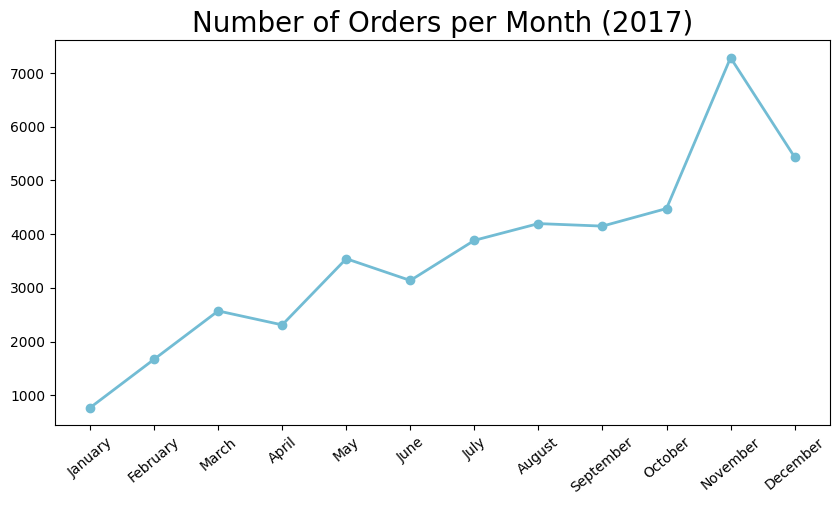

In [80]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_2018_df["order_purchase_timestamp"], monthly_orders_2018_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2017)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=40)
plt.yticks(fontsize=10)
plt.show()

In [81]:
all_data_df.to_csv("data_df.csv", index=False)

### Pertanyaan 2 : Kategori produk manakah yang memiliki rating tertinggi dan terendah?

In [82]:
all_data_df.head()

,review_id,order_id,review_score,product_id,product_category_name_english,seller_id,seller_city,seller_state,shipping_limit_date,price,customer_id,customer_city,customer_state,order_status,order_purchase_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure,6d803cb79cc31c41c4c789a75933b3c7,sao joaquim da barra,SP,2018-01-18 15:47:59,185.00,41dcb106f807e993532d446263290104,osasco,SP,delivered,2018-01-11 15:30:49
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure,6d803cb79cc31c41c4c789a75933b3c7,sao joaquim da barra,SP,2018-01-18 15:47:59,185.00,41dcb106f807e993532d446263290104,osasco,SP,delivered,2018-01-11 15:30:49
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,be0dbdc3d67d55727a65d4cd696ca73c,computers_accessories,8e6d7754bc7e0f22c96d255ebda59eba,sao jose dos campos,SP,2018-03-06 12:48:39,79.79,8a2e7ef9053dea531e4dc76bd6d853e6,nova odessa,SP,delivered,2018-02-28 12:25:19
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories,a1043bafd471dff536d0c462352beb48,ilicinea,MG,2018-02-08 10:31:15,149.00,e226dfed6544df5b7b87a48208690feb,santo antonio de jesus,BA,delivered,2018-02-03 09:56:22
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,52c80cedd4e90108bf4fa6a206ef6b03,garden_tools,a1043bafd471dff536d0c462352beb48,ilicinea,MG,2017-04-13 17:55:19,179.99,de6dff97e5f1ba84a3cd9a3bc97df5f6,gravatal,SC,delivered,2017-04-09 17:41:13


In [83]:
sum_product_reviews_df = all_data_df.groupby("product_category_name_english").review_score.mean().sort_values(ascending=False).reset_index()
sum_product_reviews_df.head(15)

,product_category_name_english,review_score
0,cds_dvds_musicals,4.642857
1,fashion_childrens_clothes,4.500000
2,books_general_interest,4.446266
3,costruction_tools_tools,4.444444
4,flowers,4.419355
5,books_imported,4.400000
6,books_technical,4.368421
7,food_drink,4.315412
8,luggage_accessories,4.315257
9,small_appliances_home_oven_and_coffee,4.302632


<ipython-input-84-8c531c2c73ad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data=sum_product_reviews_df.head(5), palette=colors, ax=ax[0])
<ipython-input-84-8c531c2c73ad>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data=sum_product_reviews_df.sort_values(by="review_score", ascending=True).head(5), palette=colors, ax=ax[1])


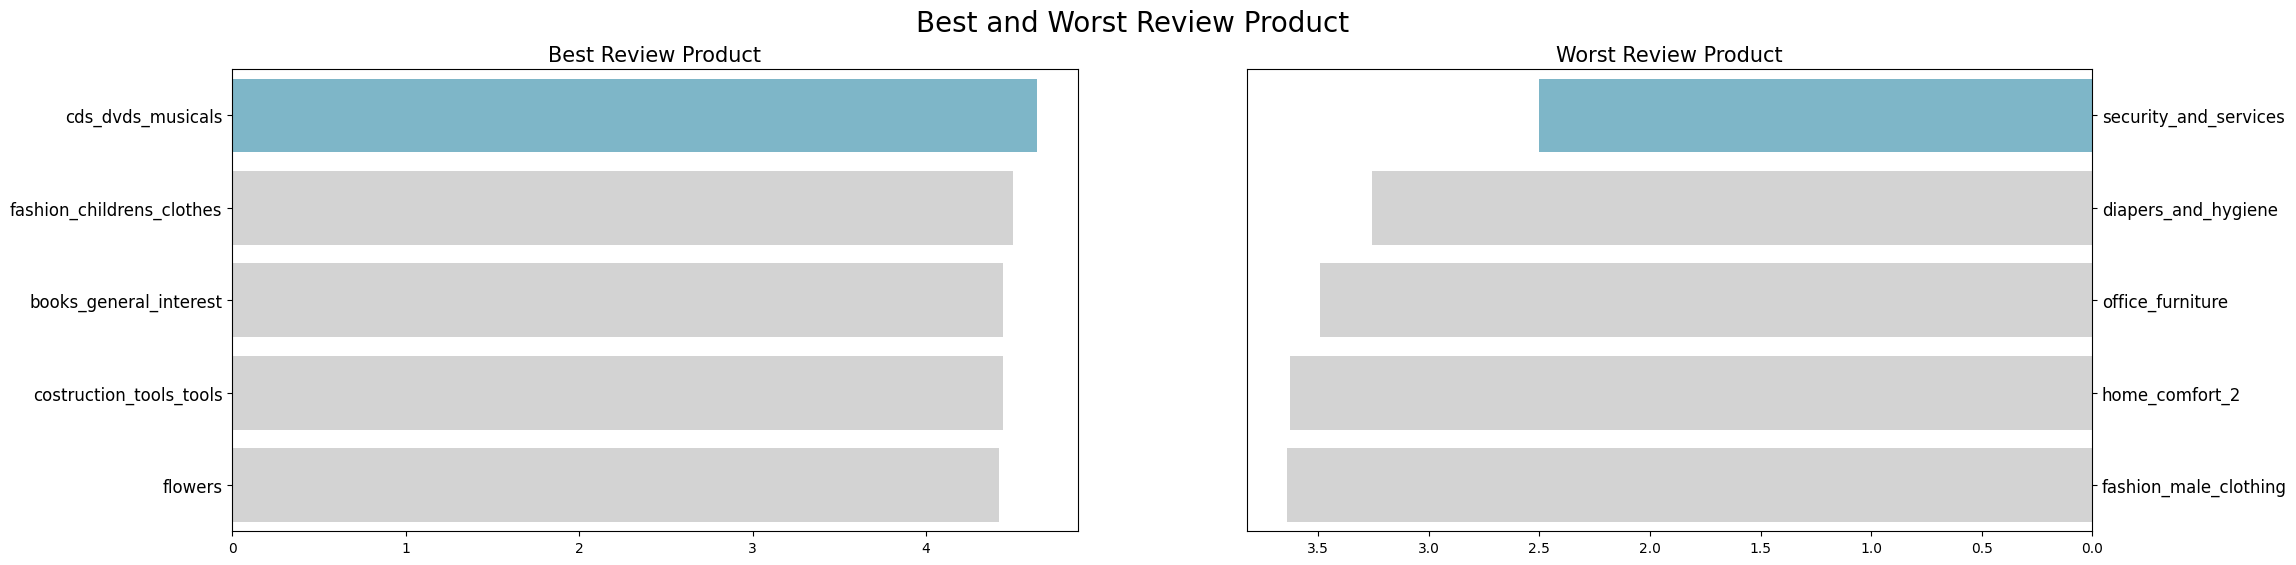

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="review_score", y="product_category_name_english", data=sum_product_reviews_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Review Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="review_score", y="product_category_name_english", data=sum_product_reviews_df.sort_values(by="review_score", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Review Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Review Product", fontsize=20)
plt.show()

### Pertanyaan 3 : Produk manakah yang paling banyak dan paling sedikit dipesan?

In [85]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110750 entries, 0 to 110749
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      110750 non-null  object        
 1   order_id                       110750 non-null  object        
 2   review_score                   110750 non-null  int64         
 3   product_id                     110750 non-null  object        
 4   product_category_name_english  110750 non-null  object        
 5   seller_id                      110750 non-null  object        
 6   seller_city                    110750 non-null  object        
 7   seller_state                   110750 non-null  object        
 8   shipping_limit_date            110750 non-null  datetime64[ns]
 9   price                          110750 non-null  float64       
 10  customer_id                    110750 non-null  object        
 11  

In [86]:
sum_product_orders_df = all_data_df.groupby("product_category_name_english").order_id.nunique().sort_values(ascending=False).reset_index()
sum_product_orders_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)
sum_product_orders_df.head(15)

,product_category_name_english,order_count
0,bed_bath_table,9313
1,health_beauty,8771
2,sports_leisure,7669
3,computers_accessories,6649
4,furniture_decor,6398
5,housewares,5843
6,watches_gifts,5576
7,telephony,4168
8,auto,3877
9,toys,3853


<ipython-input-87-8aeb11111f3b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_count", y="product_category_name_english", data=sum_product_orders_df.head(5), palette=colors, ax=ax[0])
<ipython-input-87-8aeb11111f3b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_count", y="product_category_name_english", data=sum_product_orders_df.sort_values(by="order_count", ascending=True).head(5), palette=colors, ax=ax[1])


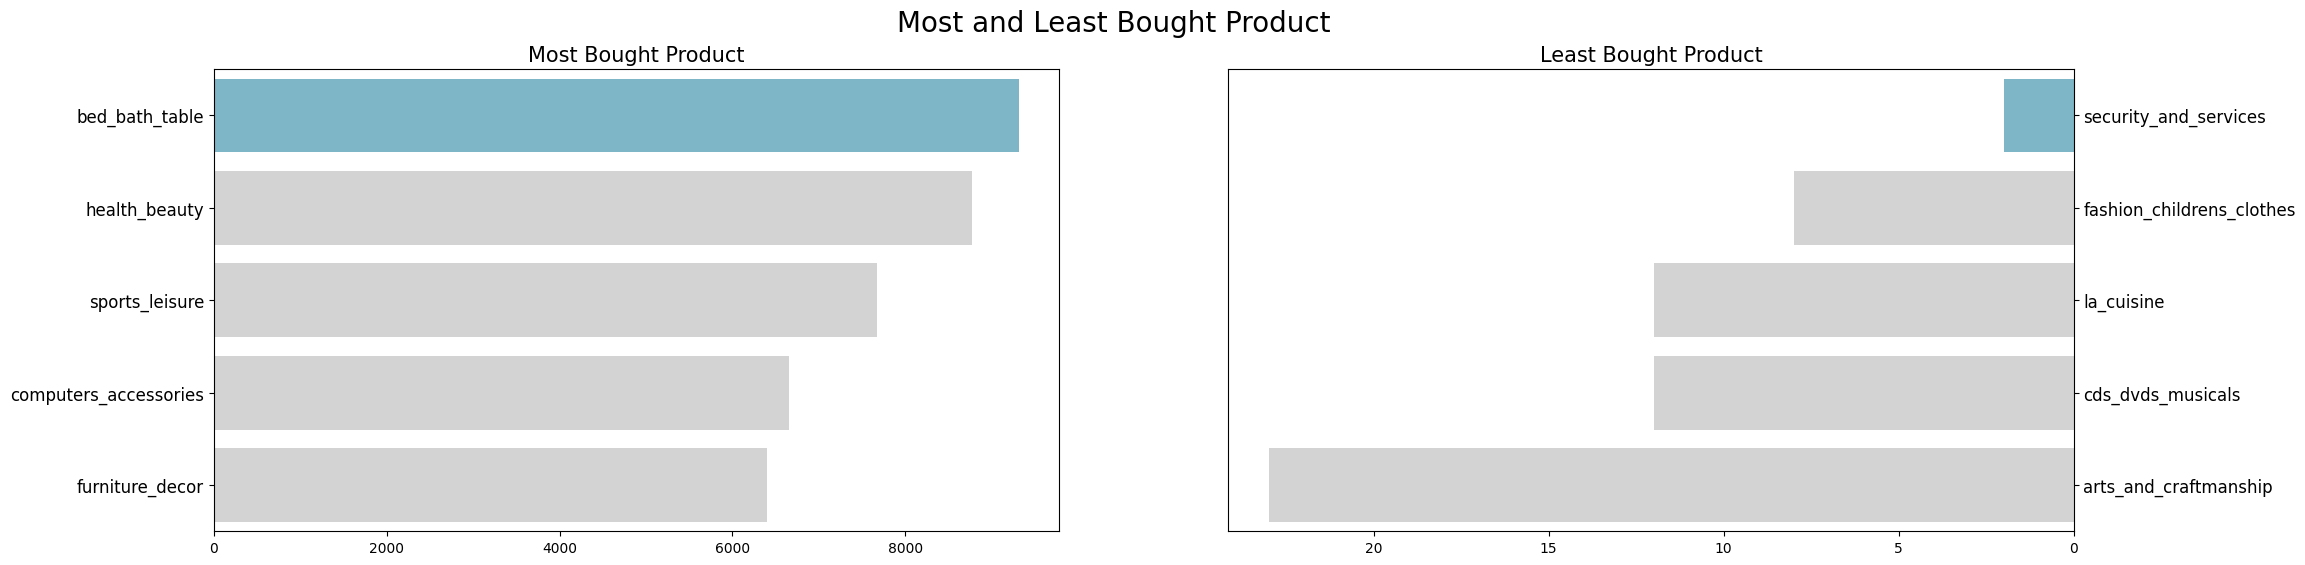

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_count", y="product_category_name_english", data=sum_product_orders_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Most Bought Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_count", y="product_category_name_english", data=sum_product_orders_df.sort_values(by="order_count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Least Bought Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Most and Least Bought Product", fontsize=20)
plt.show()

### Pertanyaan 4 : Daerah customer manakah yang paling sering melakukan pesanan?


In [88]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110750 entries, 0 to 110749
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      110750 non-null  object        
 1   order_id                       110750 non-null  object        
 2   review_score                   110750 non-null  int64         
 3   product_id                     110750 non-null  object        
 4   product_category_name_english  110750 non-null  object        
 5   seller_id                      110750 non-null  object        
 6   seller_city                    110750 non-null  object        
 7   seller_state                   110750 non-null  object        
 8   shipping_limit_date            110750 non-null  datetime64[ns]
 9   price                          110750 non-null  float64       
 10  customer_id                    110750 non-null  object        
 11  

In [89]:
sum_customer_city_orders_df = all_data_df.groupby("customer_city").customer_id.nunique().sort_values(ascending=False).reset_index()
sum_customer_city_orders_df.rename(columns={
    "customer_id": "customer"
}, inplace=True)
sum_customer_city_orders_df.head(15)

,customer_city,customer
0,sao paulo,15045
1,rio de janeiro,6640
2,belo horizonte,2682
3,brasilia,2076
4,curitiba,1486
5,campinas,1398
6,porto alegre,1345
7,salvador,1194
8,guarulhos,1150
9,sao bernardo do campo,907


In [90]:
sum_customer_state_orders_df = all_data_df.groupby("customer_state").customer_id.nunique().sort_values(ascending=False).reset_index()
sum_customer_state_orders_df.rename(columns={
    "customer_id": "customer"
}, inplace=True)
sum_customer_state_orders_df.head(15)

,customer_state,customer
0,SP,40537
1,RJ,12410
2,MG,11297
3,RS,5331
4,PR,4902
5,SC,3526
6,BA,3277
7,DF,2084
8,ES,1981
9,GO,1946


<ipython-input-91-f5142353af62>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer", y="customer_city", data=sum_customer_city_orders_df.head(5), palette=colors, ax=ax[0])
<ipython-input-91-f5142353af62>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer", y="customer_state", data=sum_customer_state_orders_df.sort_values(by="customer", ascending=True).head(5), palette=colors, ax=ax[1])


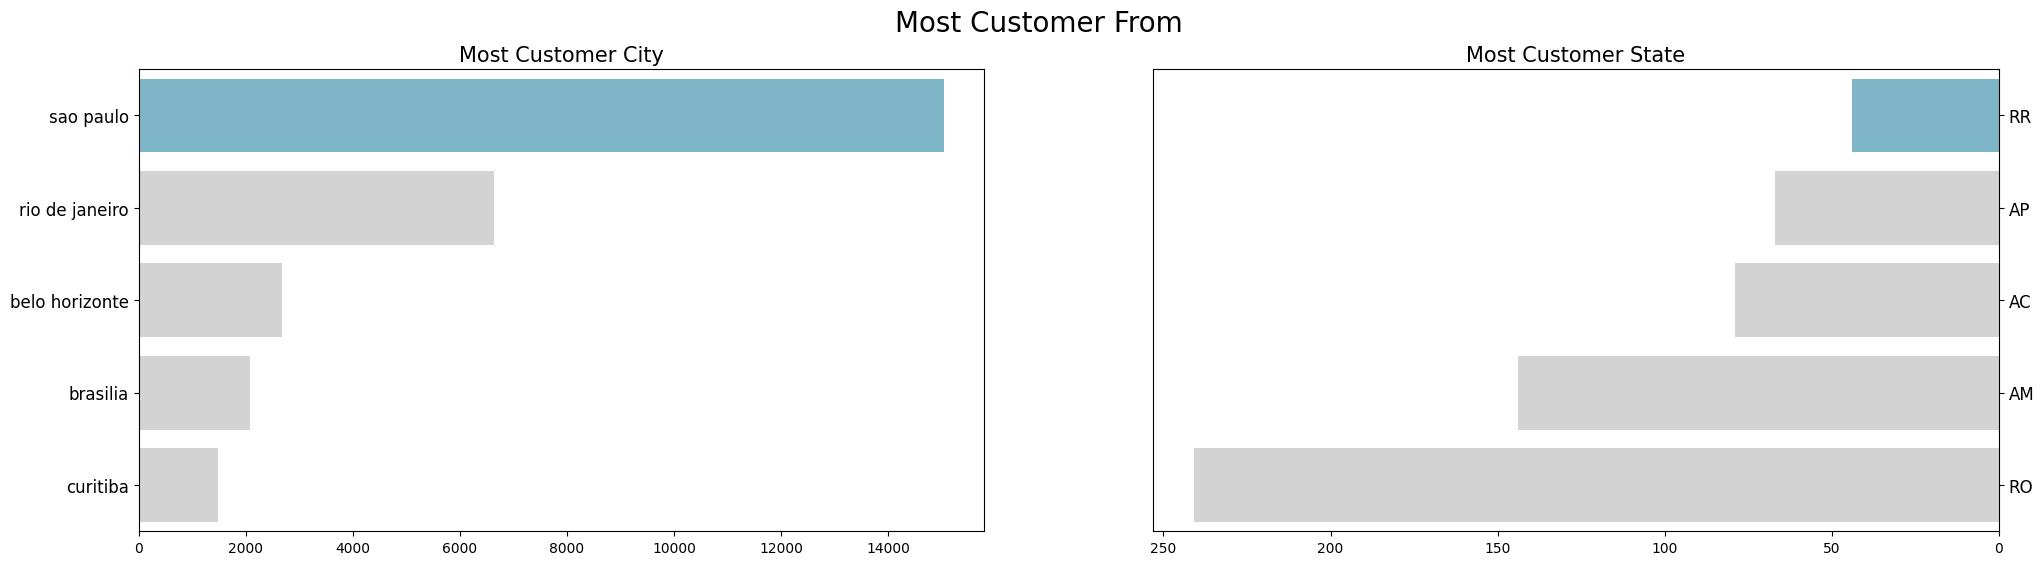

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="customer", y="customer_city", data=sum_customer_city_orders_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Most Customer City", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="customer", y="customer_state", data=sum_customer_state_orders_df.sort_values(by="customer", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Most Customer State", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Most Customer From", fontsize=20)
plt.show()

### **Insight:**
- Menjawab pertanyan 1 - 4
- Melakukan visualisasi data dalam bentuk diagram

## Analisis Lanjutan : RFM Analysis

In [92]:
rfm_df = all_data_df.groupby(by="customer_id", as_index=False).agg({
  "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
  "order_id": "nunique",
  "price": "sum"
})

rfm_df.rename(columns={
    "order_purchase_timestamp": "order_date"
    }, inplace=True)

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_data_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293
1,000161a058600d5901f007fab4c27140,1,54.90,414
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552
3,0002414f95344307404f0ace7a26f1d5,1,149.90,383
4,000379cdec625522490c315e70c7a9fb,1,93.00,154


<ipython-input-93-50754f35826b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-93-50754f35826b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=20, ha="right")
<ipython-input-93-50754f35826b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-93-50754f35826b>:17: UserWarning: FixedFormatter should only be used together with FixedLoca

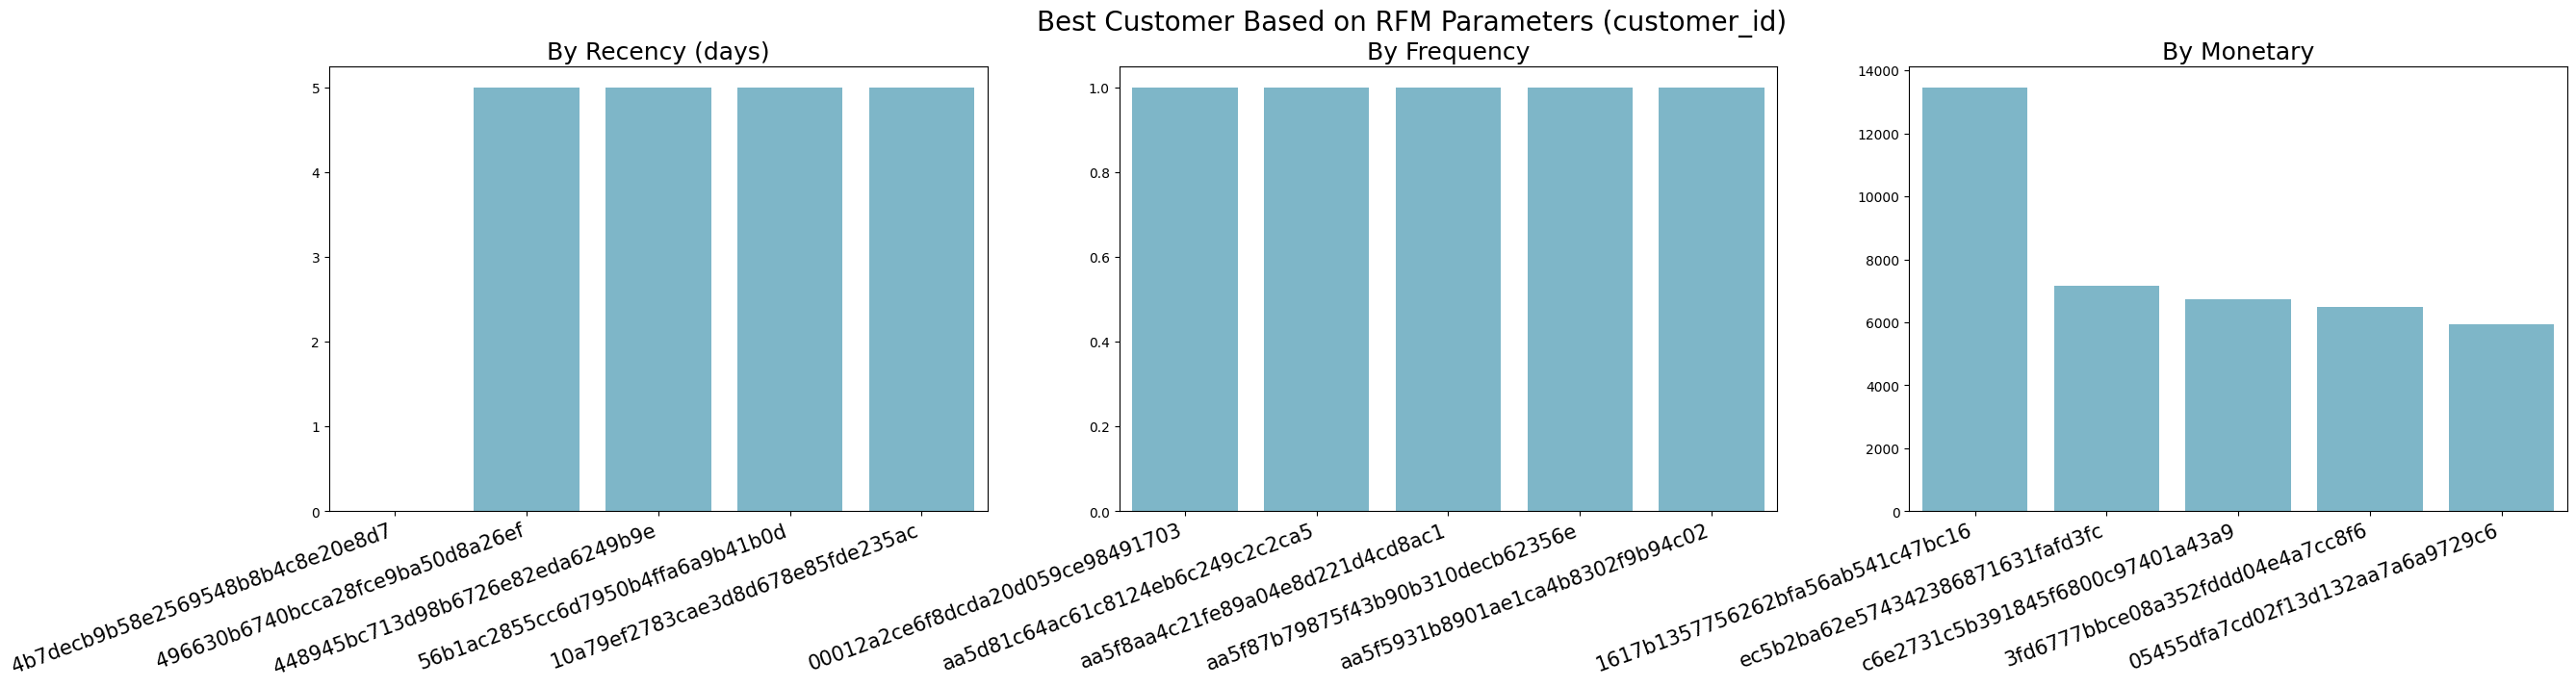

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=20, ha="right")

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=20, ha="right")

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=20, ha="right")

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

### **Insight:**
- Analisis lanjutan RFM terhadap customer
- Mengetahui customer terbaik melalui recency, frequency, dan monetary

## Save `all_data_df`

In [94]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110750 entries, 0 to 110749
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      110750 non-null  object        
 1   order_id                       110750 non-null  object        
 2   review_score                   110750 non-null  int64         
 3   product_id                     110750 non-null  object        
 4   product_category_name_english  110750 non-null  object        
 5   seller_id                      110750 non-null  object        
 6   seller_city                    110750 non-null  object        
 7   seller_state                   110750 non-null  object        
 8   shipping_limit_date            110750 non-null  datetime64[ns]
 9   price                          110750 non-null  float64       
 10  customer_id                    110750 non-null  object        
 11  

In [95]:
all_data_df.to_csv("data_df.csv", index=False)